Find all instances of python3 executable in your system's PATH.

In [2]:
!which -a python3

/opt/conda/bin/python3
/usr/bin/python3
/bin/python3


There are three instances of python3 executable on your system. The one in `/opt/conda/bin/python3` is the one provided by the Conda environment, whereas `/usr/bin/python3` and `/bin/python3` are the system's default Python installations.

In [3]:
# Clone the repository
!git clone https://github.com/alessioborgi/StyleAlignedDiffModels.git

# Change directory to the cloned repository
%cd StyleAlignedDiffModels
%ls

Cloning into 'StyleAlignedDiffModels'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 41 (delta 16), reused 9 (delta 2), pack-reused 0
Unpacking objects: 100% (41/41), 5.16 MiB | 4.04 MiB/s, done.
/kaggle/working/StyleAlignedDiffModels
LICENSE                  Style_Aligned_SDXL.ipynb  sa_handler.py
README.md                baselines/                styleAligned.ipynb
StyleAligned_SDXL.ipynb  requirements.txt          train/


In [4]:
!which -a pip

/opt/conda/bin/pip
/usr/bin/pip
/bin/pip


In [5]:
# Install the required packages
!pip install -r requirements.txt > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
distributed 2023.7.1 requires dask==2023.7.1, but you have dask 2024.4.1 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storage 1.44.0 which is incompatible.
kfp 2.5.0 requires urllib3<2.0.0, but you have urllib3 2.2.1 which is incompatible.
raft-dask 23.8.0 requires dask==2023.7.1, but you have dask 2024.4.1 which is incompatible.
spacy 3.7.3 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 w

In [6]:
import torch
torch.cuda.empty_cache()
from diffusers import StableDiffusionXLPipeline, DDIMScheduler
import mediapy
import sa_handler
import gradio as gr

print('Modules imported successfully')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-05-22 14:28:50.720814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 14:28:50.720923: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 14:28:50.860767: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Modules imported successfully


In [7]:
# init models

scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False,
                              set_alpha_to_one=False)
pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True,
    scheduler=scheduler
).to("cuda")

handler = sa_handler.Handler(pipeline)
sa_args = sa_handler.StyleAlignedArgs(share_group_norm=False,
                                      share_layer_norm=False,
                                      share_attention=True,
                                      adain_queries=True,
                                      adain_keys=True,
                                      adain_values=False,
                                     )

handler.register(sa_args, )

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   6727 MiB |   6727 MiB |   6727 MiB |      0 B   |
|       from large pool |   6652 MiB |   6652 MiB |   6652 MiB |      0 B   |
|       from small pool |     74 MiB |     74 MiB |     74 MiB |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |   6727 MiB |   6727 MiB |   6727 MiB |      0 B   |
|       from large pool |   6652 MiB |   6652 MiB |   6652 MiB |

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


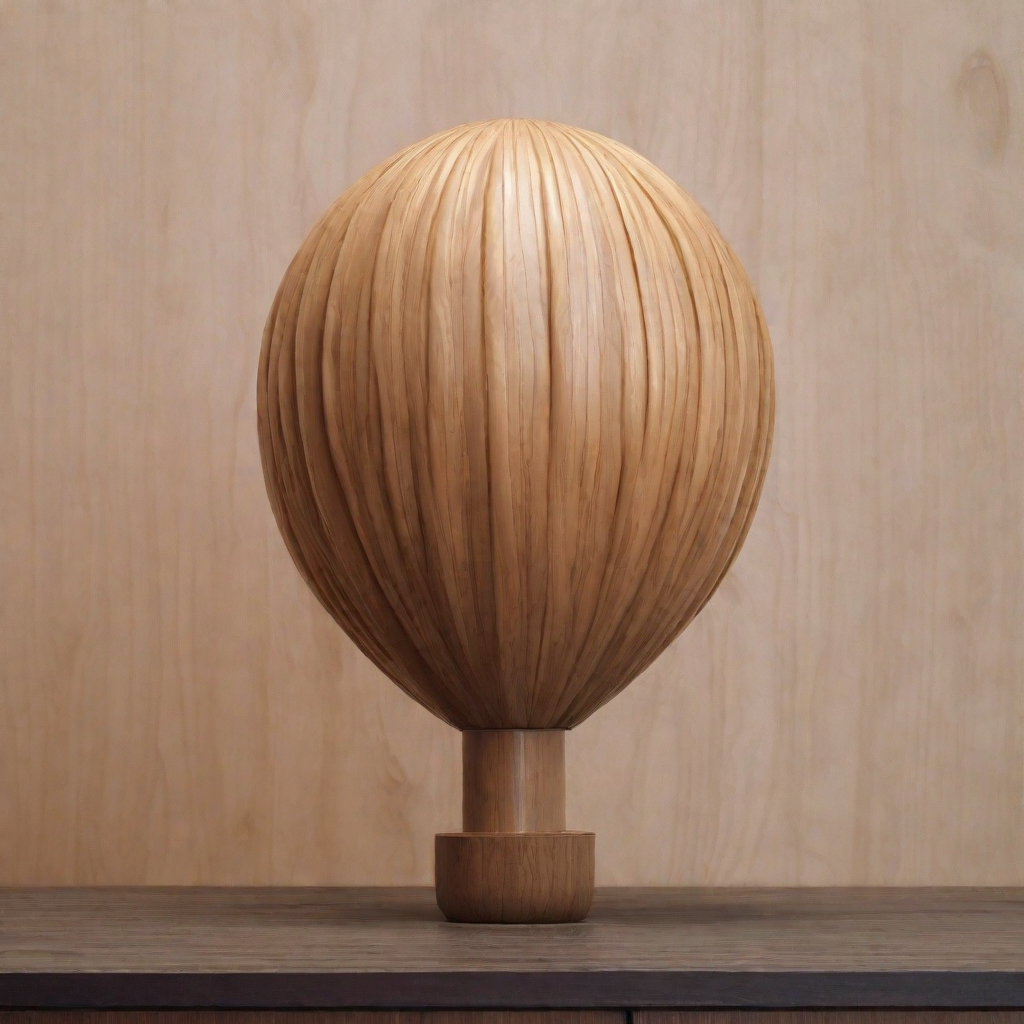
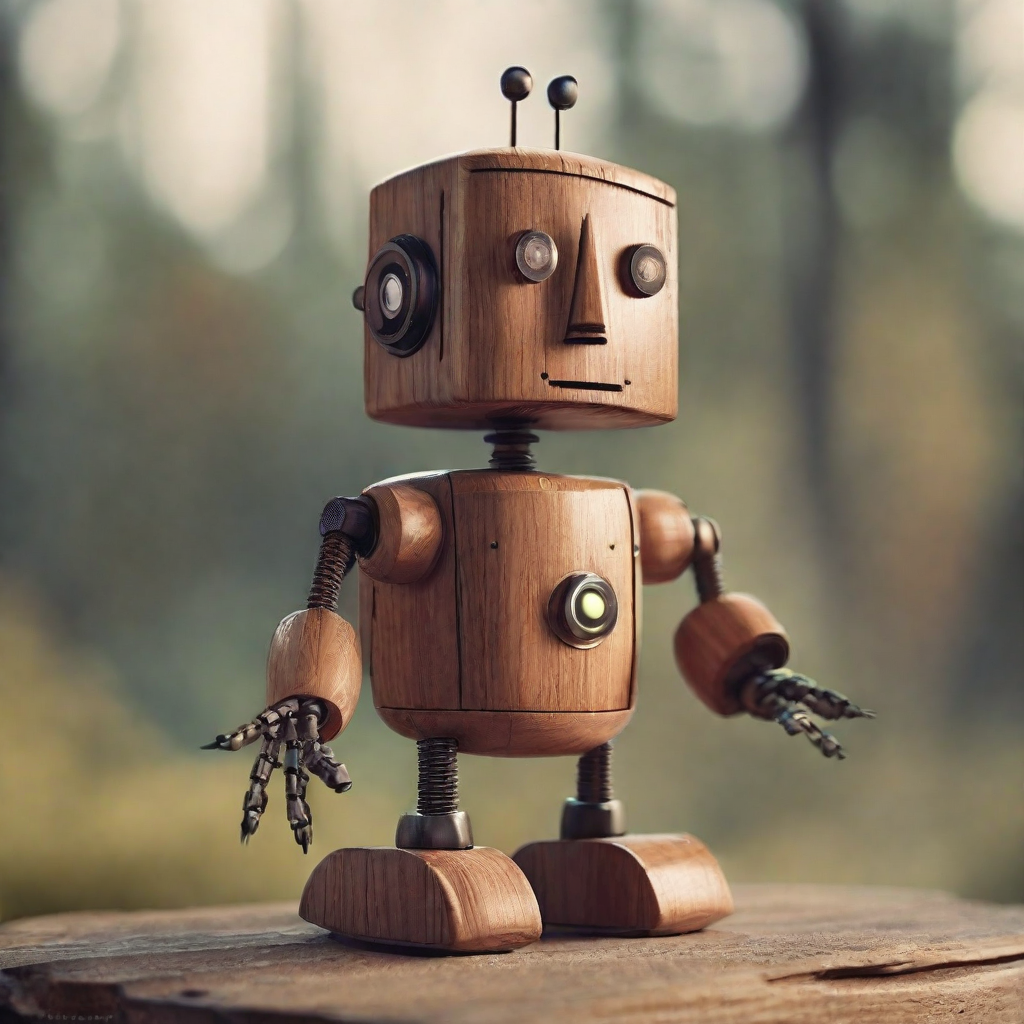
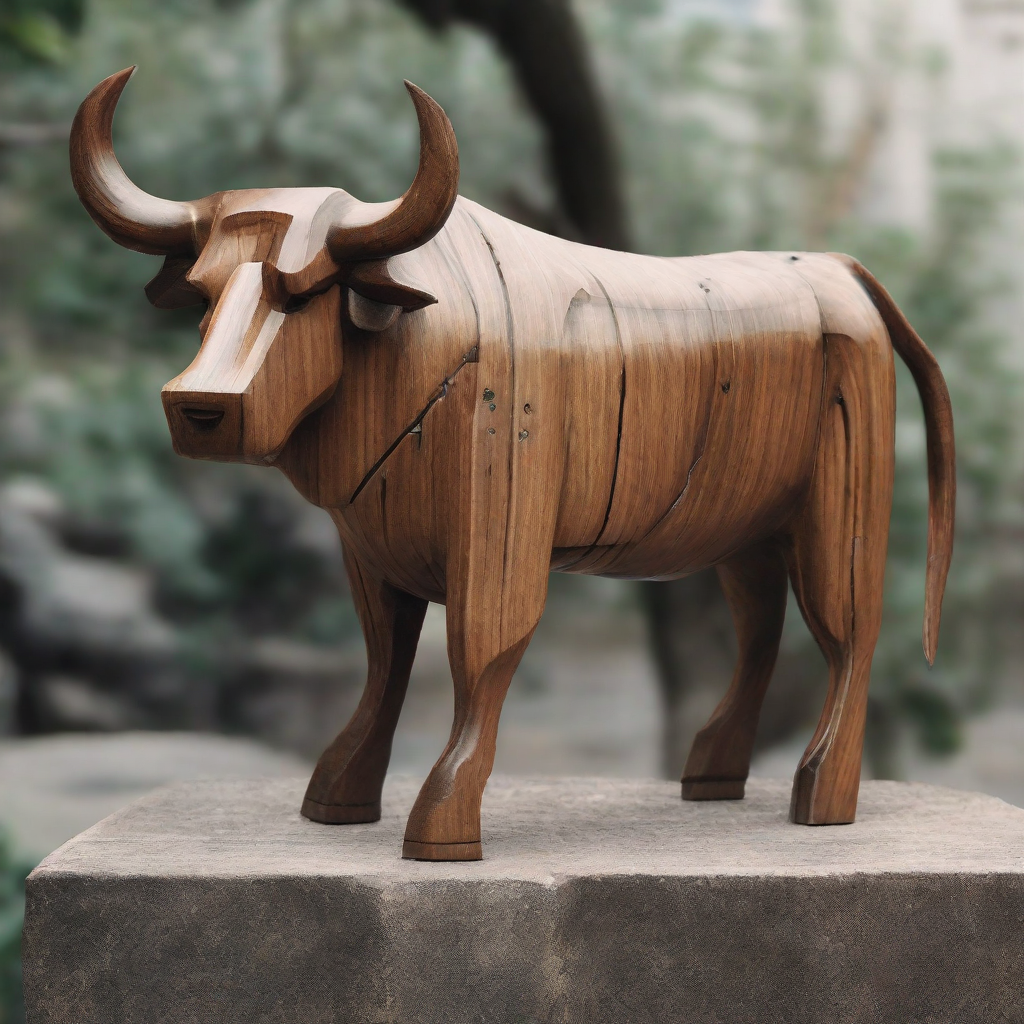

In [9]:
# run StyleAligned
sets_of_prompts = [
  "a toy train. macro photo. 3d game asset",
  "a toy airplane. macro photo. 3d game asset",
  "a toy bicycle. macro photo. 3d game asset",
  "a toy car. macro photo. 3d game asset",
  "a toy boat. macro photo. 3d game asset",
]
sets_of_prompts = [
  "a hot hair balloon, simple wooden statue",
  "a friendly robot, simple wooden statue",
  "a bull, simple wooden statue",
]
images = []
for prompt in sets_of_prompts:
    # Generate image for each prompt individually
    image = pipeline([prompt]).images[0]
    images.append(image)
    # Clear CUDA cache to free memory
    torch.cuda.empty_cache()
    
    # Print Memory summary
    # print(torch.cuda.memory_summary(device=None, abbreviated=False))
    
mediapy.show_images(images)

Suggestions for Improving Results
Enhanced Attention Mechanisms:

Multi-Head Attention Optimization: Fine-tuning the number of attention heads and the way they share information could improve style consistency and reduce content leakage.
Dynamic Attention Sharing: Implementing a dynamic mechanism that adjusts the level of attention sharing based on the complexity of the input text and style might lead to better results.
Advanced Normalization Techniques:

Layer-wise AdaIN: Instead of a single AdaIN operation, applying layer-wise adaptive normalization could better capture and transfer intricate style details.
Combining Normalization Methods: Experiment with combining AdaIN with other normalization techniques like batch normalization or instance normalization to see if it enhances style transfer.
Incorporating Contextual Information:

Contextual Embeddings: Use contextual embeddings from large language models to provide additional information during the attention process, which might improve the alignment of complex styles.
Cross-Modal Attention: Integrate cross-modal attention mechanisms that consider both textual and visual contexts simultaneously, enhancing the model's ability to capture and maintain style consistency.
Architectural Modifications
Modular Attention Layers:

Plug-and-Play Attention Modules: Design modular attention layers that can be easily plugged into different parts of the network, allowing for flexible experimentation with where and how attention is shared.
Hierarchical Attention: Implement a hierarchical attention mechanism where different levels of the network focus on different aspects of style and content, ensuring a more granular alignment.
Enhanced U-Net Architecture:

Deeper U-Net: Extend the depth of the U-Net architecture used in the diffusion process to capture more detailed features at multiple scales, which could improve the richness of the generated styles.
Skip Connections with Style Information: Incorporate skip connections that carry style information directly from the input to deeper layers of the network, preserving style details more effectively.
Integration with Generative Adversarial Networks (GANs):

Hybrid Diffusion-GAN Model: Combine the diffusion model with a GAN to leverage the strengths of both architectures. The GAN could help refine the generated images and further enforce style consistency.
Discriminator Focused on Style: Train a style-focused discriminator in the GAN setup that specifically evaluates the style consistency of generated images, providing more direct feedback during training.

In [10]:
!export COMMANDLINE_ARGS="--no-gradio-queue"

In [11]:
# init models
scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False,
                              set_alpha_to_one=False)
pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True,
    scheduler=scheduler
).to("cuda")
# Configure the pipeline for CPU offloading and VAE slicing#pipeline.enable_sequential_cpu_offload()
pipeline.enable_model_cpu_offload() 
pipeline.enable_vae_slicing()
# Initialize the style-aligned handler
handler = sa_handler.Handler(pipeline)
sa_args = sa_handler.StyleAlignedArgs(share_group_norm=False,
                                      share_layer_norm=False,
                                      share_attention=True,
                                      adain_queries=True,
                                      adain_keys=True,
                                      adain_values=False,
                                     )

handler.register(sa_args, )

# Define the function to generate style-aligned images
def style_aligned_sdxl(initial_prompt1, initial_prompt2, initial_prompt3, initial_prompt4,
                       initial_prompt5, style_prompt, seed):
    try:
        # Combine the style prompt with each initial prompt
        gen = None if seed is None else torch.manual_seed(int(seed))
        sets_of_prompts = [prompt + " in the style of " + style_prompt for prompt in [initial_prompt1, initial_prompt2, initial_prompt3, initial_prompt4, initial_prompt5] if prompt]
        # Generate images using the pipeline
        images = pipeline(sets_of_prompts, generator=gen).images
        return images
    except Exception as e:
        raise gr.Error(f"Error in generating images: {e}")

with gr.Blocks() as demo:
    gr.HTML('<h1 style="text-align: center;">StyleAligned SDXL</h1>')
    with gr.Group():
      with gr.Column():
        with gr.Accordion(label='Enter upto 5 different initial prompts', open=True):
          with gr.Row(variant='panel'):
            # Textboxes for initial prompts
            initial_prompt1 = gr.Textbox(label='Initial prompt 1', value='', show_label=False, container=False, placeholder='a toy train')
            initial_prompt2 = gr.Textbox(label='Initial prompt 2', value='', show_label=False, container=False, placeholder='a toy airplane')
            initial_prompt3 = gr.Textbox(label='Initial prompt 3', value='', show_label=False, container=False, placeholder='a toy bicycle')
            initial_prompt4 = gr.Textbox(label='Initial prompt 4', value='', show_label=False, container=False, placeholder='a toy car')
            initial_prompt5 = gr.Textbox(label='Initial prompt 5', value='', show_label=False, container=False, placeholder='a toy boat')
        with gr.Row():
          # Textbox for the style prompt
          style_prompt = gr.Textbox(label="Enter a style prompt", placeholder='macro photo, 3d game asset', scale=3)
          seed = gr.Number(value=1234, label="Seed", precision=0, step=1, scale=1,
                           info="Enter a seed of a previous run "
                                "or leave empty for a random generation.")
        # Button to generate images
        btn = gr.Button("Generate a set of Style-aligned SDXL images",)
    # Display the generated images
    output = gr.Gallery(label="Style aligned text-to-image on SDXL ", elem_id="gallery",columns=5, rows=1,
                        object_fit="contain", height="auto",)

    # Button click event
    btn.click(fn=style_aligned_sdxl, 
              inputs=[initial_prompt1, initial_prompt2, initial_prompt3, initial_prompt4, initial_prompt5,
                      style_prompt, seed],
              outputs=output, 
              api_name="style_aligned_sdxl")

    # Providing Example inputs for the demo
    gr.Examples(examples=[
                    ["a toy train", "a toy airplane", "a toy bicycle", "a toy car", "a toy boat", "macro photo. 3d game asset."],
                    ["a toy train", "a toy airplane", "a toy bicycle", "a toy car", "a toy boat", "BW logo. high contrast."],
                    ["a cat", "a dog", "a bear", "a man on a bicycle", "a girl working on laptop", "minimal origami."],
                    ["a firewoman", "a Gardner", "a scientist", "a policewoman", "a saxophone player", "made of claymation, stop motion animation."],
                    ["a firewoman", "a Gardner", "a scientist", "a policewoman", "a saxophone player", "sketch, character sheet."],
                    ],
            inputs=[initial_prompt1, initial_prompt2, initial_prompt3, initial_prompt4, initial_prompt5, style_prompt],
            outputs=[output],
            fn=style_aligned_sdxl)

# Launch the Gradio demo
demo.launch(share=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://2b1c0d94bdaea894c9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:

from __future__ import annotations

from dataclasses import dataclass
from diffusers import StableDiffusionXLPipeline
import torch
import torch.nn as nn
from torch.nn import functional as nnf
from diffusers.models import attention_processor
import einops

T = torch.Tensor


@dataclass(frozen=True)
class StyleAlignedArgs:
    share_group_norm: bool = True
    share_layer_norm: bool = True,
    share_attention: bool = True
    adain_queries: bool = True
    adain_keys: bool = True
    adain_values: bool = False
    full_attention_share: bool = False
    shared_score_scale: float = 1.
    shared_score_shift: float = 0.
    only_self_level: float = 0.


def expand_first(feat: T, scale=1.,) -> T:
    b = feat.shape[0]
    feat_style = torch.stack((feat[0], feat[b // 2])).unsqueeze(1)
    if scale == 1:
        feat_style = feat_style.expand(2, b // 2, *feat.shape[1:])
    else:
        feat_style = feat_style.repeat(1, b // 2, 1, 1, 1)
        feat_style = torch.cat([feat_style[:, :1], scale * feat_style[:, 1:]], dim=1)
    return feat_style.reshape(*feat.shape)


def concat_first(feat: T, dim=2, scale=1.) -> T:
    feat_style = expand_first(feat, scale=scale)
    return torch.cat((feat, feat_style), dim=dim)


def calc_mean_std(feat, eps: float = 1e-5) -> tuple[T, T]:
    feat_std = (feat.var(dim=-2, keepdims=True) + eps).sqrt()
    feat_mean = feat.mean(dim=-2, keepdims=True)
    return feat_mean, feat_std


def adain(feat: T) -> T:
    feat_mean, feat_std = calc_mean_std(feat)
    feat_style_mean = expand_first(feat_mean)
    feat_style_std = expand_first(feat_std)
    feat = (feat - feat_mean) / feat_std
    feat = feat * feat_style_std + feat_style_mean
    return feat

In [ ]:
class DefaultAttentionProcessor(nn.Module):

    def __init__(self):
        super().__init__()
        self.processor = attention_processor.AttnProcessor2_0()

    def __call__(self, attn: attention_processor.Attention, hidden_states, encoder_hidden_states=None,
                 attention_mask=None, **kwargs):
        return self.processor(attn, hidden_states, encoder_hidden_states, attention_mask)

In [ ]:
class SharedAttentionProcessor(DefaultAttentionProcessor):

    def shifted_scaled_dot_product_attention(self, attn: attention_processor.Attention, query: T, key: T, value: T) -> T:
        logits = torch.einsum('bhqd,bhkd->bhqk', query, key) * attn.scale
        logits[:, :, :, query.shape[2]:] += self.shared_score_shift
        probs = logits.softmax(-1)
        return torch.einsum('bhqk,bhkd->bhqd', probs, value)

    def shared_call(
            self,
            attn: attention_processor.Attention,
            hidden_states,
            encoder_hidden_states=None,
            attention_mask=None,
            **kwargs
    ):

        residual = hidden_states
        input_ndim = hidden_states.ndim
        if input_ndim == 4:
            batch_size, channel, height, width = hidden_states.shape
            hidden_states = hidden_states.view(batch_size, channel, height * width).transpose(1, 2)
        batch_size, sequence_length, _ = (
            hidden_states.shape if encoder_hidden_states is None else encoder_hidden_states.shape
        )

        if attention_mask is not None:
            attention_mask = attn.prepare_attention_mask(attention_mask, sequence_length, batch_size)
            # scaled_dot_product_attention expects attention_mask shape to be
            # (batch, heads, source_length, target_length)
            attention_mask = attention_mask.view(batch_size, attn.heads, -1, attention_mask.shape[-1])

        if attn.group_norm is not None:
            hidden_states = attn.group_norm(hidden_states.transpose(1, 2)).transpose(1, 2)

        query = attn.to_q(hidden_states)
        key = attn.to_k(hidden_states)
        value = attn.to_v(hidden_states)
        inner_dim = key.shape[-1]
        head_dim = inner_dim // attn.heads

        query = query.view(batch_size, -1, attn.heads, head_dim).transpose(1, 2)
        key = key.view(batch_size, -1, attn.heads, head_dim).transpose(1, 2)
        value = value.view(batch_size, -1, attn.heads, head_dim).transpose(1, 2)
        # if self.step >= self.start_inject:
        if self.adain_queries:
            query = adain(query)
        if self.adain_keys:
            key = adain(key)
        if self.adain_values:
            value = adain(value)
        if self.share_attention:
            key = concat_first(key, -2, scale=self.shared_score_scale)
            value = concat_first(value, -2)
            if self.shared_score_shift != 0:
                hidden_states = self.shifted_scaled_dot_product_attention(attn, query, key, value,)
            else:
                hidden_states = nnf.scaled_dot_product_attention(
                    query, key, value, attn_mask=attention_mask, dropout_p=0.0, is_causal=False
                )
        else:
            hidden_states = nnf.scaled_dot_product_attention(
                query, key, value, attn_mask=attention_mask, dropout_p=0.0, is_causal=False
            )
        # hidden_states = adain(hidden_states)
        hidden_states = hidden_states.transpose(1, 2).reshape(batch_size, -1, attn.heads * head_dim)
        hidden_states = hidden_states.to(query.dtype)

        # linear proj
        hidden_states = attn.to_out[0](hidden_states)
        # dropout
        hidden_states = attn.to_out[1](hidden_states)

        if input_ndim == 4:
            hidden_states = hidden_states.transpose(-1, -2).reshape(batch_size, channel, height, width)

        if attn.residual_connection:
            hidden_states = hidden_states + residual

        hidden_states = hidden_states / attn.rescale_output_factor
        return hidden_states

    def __call__(self, attn: attention_processor.Attention, hidden_states, encoder_hidden_states=None,
                 attention_mask=None, **kwargs):
        if self.full_attention_share:
            b, n, d = hidden_states.shape
            hidden_states = einops.rearrange(hidden_states, '(k b) n d -> k (b n) d', k=2)
            hidden_states = super().__call__(attn, hidden_states, encoder_hidden_states=encoder_hidden_states,
                                             attention_mask=attention_mask, **kwargs)
            hidden_states = einops.rearrange(hidden_states, 'k (b n) d -> (k b) n d', n=n)
        else:
            hidden_states = self.shared_call(attn, hidden_states, hidden_states, attention_mask, **kwargs)

        return hidden_states

    def __init__(self, style_aligned_args: StyleAlignedArgs):
        super().__init__()
        self.share_attention = style_aligned_args.share_attention
        self.adain_queries = style_aligned_args.adain_queries
        self.adain_keys = style_aligned_args.adain_keys
        self.adain_values = style_aligned_args.adain_values
        self.full_attention_share = style_aligned_args.full_attention_share
        self.shared_score_scale = style_aligned_args.shared_score_scale
        self.shared_score_shift = style_aligned_args.shared_score_shift


def _get_switch_vec(total_num_layers, level):
    if level == 0:
        return torch.zeros(total_num_layers, dtype=torch.bool)
    if level == 1:
        return torch.ones(total_num_layers, dtype=torch.bool)
    to_flip = level > .5
    if to_flip:
        level = 1 - level
    num_switch = int(level * total_num_layers)
    vec = torch.arange(total_num_layers)
    vec = vec % (total_num_layers // num_switch)
    vec = vec == 0
    if to_flip:
        vec = ~vec
    return vec


def init_attention_processors(pipeline: StableDiffusionXLPipeline, style_aligned_args: StyleAlignedArgs | None = None):
    attn_procs = {}
    unet = pipeline.unet
    number_of_self, number_of_cross = 0, 0
    num_self_layers = len([name for name in unet.attn_processors.keys() if 'attn1' in name])
    if style_aligned_args is None:
        only_self_vec = _get_switch_vec(num_self_layers, 1)
    else:
        only_self_vec = _get_switch_vec(num_self_layers, style_aligned_args.only_self_level)
    for i, name in enumerate(unet.attn_processors.keys()):
        is_self_attention = 'attn1' in name
        if is_self_attention:
            number_of_self += 1
            if style_aligned_args is None or only_self_vec[i // 2]:
                attn_procs[name] = DefaultAttentionProcessor()
            else:
                attn_procs[name] = SharedAttentionProcessor(style_aligned_args)
        else:
            number_of_cross += 1
            attn_procs[name] = DefaultAttentionProcessor()

    unet.set_attn_processor(attn_procs)


def register_shared_norm(pipeline: StableDiffusionXLPipeline,
                         share_group_norm: bool = True,
                         share_layer_norm: bool = True, ):
    def register_norm_forward(norm_layer: nn.GroupNorm | nn.LayerNorm) -> nn.GroupNorm | nn.LayerNorm:
        if not hasattr(norm_layer, 'orig_forward'):
            setattr(norm_layer, 'orig_forward', norm_layer.forward)
        orig_forward = norm_layer.orig_forward

        def forward_(hidden_states: T) -> T:
            n = hidden_states.shape[-2]
            hidden_states = concat_first(hidden_states, dim=-2)
            hidden_states = orig_forward(hidden_states)
            return hidden_states[..., :n, :]

        norm_layer.forward = forward_
        return norm_layer

    def get_norm_layers(pipeline_, norm_layers_: dict[str, list[nn.GroupNorm | nn.LayerNorm]]):
        if isinstance(pipeline_, nn.LayerNorm) and share_layer_norm:
            norm_layers_['layer'].append(pipeline_)
        if isinstance(pipeline_, nn.GroupNorm) and share_group_norm:
            norm_layers_['group'].append(pipeline_)
        else:
            for layer in pipeline_.children():
                get_norm_layers(layer, norm_layers_)

    norm_layers = {'group': [], 'layer': []}
    get_norm_layers(pipeline.unet, norm_layers)
    return [register_norm_forward(layer) for layer in norm_layers['group']] + [register_norm_forward(layer) for layer in
                                                                               norm_layers['layer']]

In [ ]:


class Handler:

    def register(self, style_aligned_args: StyleAlignedArgs, ):
        self.norm_layers = register_shared_norm(self.pipeline, style_aligned_args.share_group_norm,
                                                style_aligned_args.share_layer_norm)
        init_attention_processors(self.pipeline, style_aligned_args)

    def remove(self):
        for layer in self.norm_layers:
            layer.forward = layer.orig_forward
        self.norm_layers = []
        init_attention_processors(self.pipeline, None)

    def __init__(self, pipeline: StableDiffusionXLPipeline):
        self.pipeline = pipeline
        self.norm_layers = []